# Assignment2

## Instructions

1.	Your manager doesn’t know much about analytics.  That is too bad, but don’t worry, you’ll have his job soon enough.  In the meantime he has made the following comments.  If his suggestions / comments are good ones, explain why; if they are bad ones, explain why and what you should do to fix them or do better.  Make sure your answer demonstrates that you have a sophisticated understanding of the issues involved. 


1a.	“If the p-value for the ‘joint F-test’ is too large – say greater than 0.05 – there is really no point in looking at the rest of the regression output.  The model is just plain crap.” 3 marks

** A large F-Value suggests that we should reject the null hypothesis. Meaning that some of variables in the model may not be significant for predicting. This does not mean that we should dismiss all variables in the model, but instead look at each individual variable to determine the significance to the predictor.

1b.	“When you detect an outlier, you should just replace it with the mean value of the dataset.” 3 marks

** Outliers can significantly influence the mean of a dataset, making it a biased replacement value. Moreover, simply replacing outliers with the mean does not address the underlying reasons for their existence and can lead to misleading analysis. Outliers should be carefully analyzed to understand why they occurred—whether they result from data entry errors, measurement errors, or represent a natural but rare event in the distribution. **


1c.	“When conducting a hypothesis test, like the t-test, you should always set alpha = 0.05.” 3 marks

** The choice of alpha (significance level) should be context-specific and not just set by convention. Alpha = 0.05 is commonly used but choosing it should depend on the balance between Type I errors (false positives) and Type II errors (false negatives), as well as the consequences of each in the specific context. In scenarios where the cost of a Type I error is high, a smaller alpha might be appropriate.


1d.	“Our hotel did a customer satisfaction survey for all the guests who visited last weekend.  The results were plagued by heteroskedasticity, so we basically had to scrap the results and start again.” 3 marks

** Imagine you’re taking photos with a camera where the focus isn’t consistent. Some photos come out crisp (low variance), and some are blurry (high variance), depending on how much light there is. Heteroskedasticity in statistics is similar: the spread or “noise” in your data changes depending on the value of what you’re measuring. This can mess up your analysis because the usual statistical tests assume the noise level is consistent across all measurements.

However, just like you wouldn’t throw out all photos because some are blurry, you don’t need to discard your survey or study results if there’s heteroskedasticity. You can adjust your methods to handle this inconsistency.

Simple Recommendation

Instead of tossing out your data when you find varying noise levels (heteroskedasticity), you can use special tools and techniques to correct for it. These include:

1.	Changing the scale of the data: Like switching from measuring in square feet to logarithm of square feet to even out the noise.
2.	Weighted methods: Giving more importance to more reliable (less noisy) data when you analyze it, sort of like paying more attention to the clearer photos.

### 2.	Your client has asked you to perform some analysis on the data found on the tab Missing.
a.	Explain in language that your manager is likely to understand how multiple imputation deals with missing values. 2 marks

In [2]:
#Importing Data
import os
import pandas as pd

db_dir = os.getcwd()
df = pd.read_excel(db_dir + r'/MMA860 Assignment 2 Data.xlsx', sheet_name='Missing')
df.info()


# Imputation is a process used to substitute missing data with estimated values. Although this initially seems beneficial, the estimated values often have 
# less variability compared to the original data, which can lead to inaccuracies. To mitigate this, multiple imputation techniques are commonly used. 
# In multiple imputation, several imputed datasets are created where the missing values are filled using a model that incorporates both an estimate 
# of the missing value and a term for random error to introduce variability. This model is applied multiple times, and the results are averaged to 
# derive a final estimate. This process helps reduce the risk of overfitting the data, which can occur when a model is too closely tailored to a 
# specific set of data points.

# Software Automation and Variability:
# The entire process of multiple imputation, including the generation of multiple datasets and the averaging of outcomes, is typically automated 
# within statistical software. This makes the process efficient and user-friendly, as users do not need to perform these calculations manually.

# Addressing Different Types of Missing Data:
# The approach can be adjusted to handle different patterns of missing data, such as Missing Completely at Random (MCAR) or Missing at Random (MAR). 
# In larger samples, these adjustments are more reliable and allow for more accurate imputation.

# This explanation demonstrates the practical applications and benefits of multiple imputation in statistical analysis, particularly in handling 
# missing data while maintaining the integrity and reliability of the results.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Obs     100 non-null    int64  
 1   Y       100 non-null    int64  
 2   X1      99 non-null     float64
 3   X2      95 non-null     float64
 4   X3      99 non-null     float64
 5   X4      96 non-null     float64
 6   X5      98 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 5.6 KB


b.	Under what condition(s) could multiple imputation be used reliably to deal with missing values.  Provide an original example (i.e. not ones that I have provided or that we have discussed in class) to illustrate when multiple imputation could reliably be used – if there are more than one condition, be sure to illustrate them all and describe how they apply in your example. 4 marks

** Multiple imputation can be reliably used to handle missing data under certain conditions, primarily revolving around the nature and pattern of the missing data. Here are the key conditions and an illustrative example:

Conditions for Reliable Use of Multiple Imputation

1.	Missing at Random (MAR): Multiple imputation works best when the missingness of the data is not related to the missing values themselves but may be related to other observed data. This means that the propensity for a data point to be missing is related to some other measured variable in the dataset, but not to the value of the missing data itself.
2.	Sufficient Sample Size: There should be enough complete cases or partially complete cases with sufficient overlapping information that can help in predicting the missing values accurately.
3.	Appropriate Model for Imputation: The statistical models used to impute values must be correctly specified, including the relationships between variables. A poor model can lead to biased imputation.

Scenario: A company wants to analyze the factors affecting employee productivity. The dataset includes variables such as hours worked, job satisfaction, stress levels, and productivity scores. However, some values are missing across these variables.

1. Hours Worked: Recorded via an automated system; no missing data.\
2. Job Satisfaction: Survey-based; missing data as not all employees completed the survey.
3. Stress Levels: Also survey-based; missing similarly to job satisfaction.
4. Productivity Scores: Assessed by supervisors; missing in cases where supervisors failed to submit evaluations.

Application of Conditions:

1. MAR: We assume that the missingness in job satisfaction and stress levels is related to observable variables like department or role, which might influence survey participation (e.g., busier departments might have lower response rates). However, it’s not directly related to the employees’ actual satisfaction or stress levels. Similarly, missing productivity scores could be related to the supervisor’s workload and not to the employee’s actual productivity.
2. Sufficient Sample Size: The company has a large number of employees across various departments, providing enough data points with varying degrees of overlap between the observed variables. This overlap can help in reliably predicting the missing values.
3. Appropriate Model for Imputation: The imputation model could include predictors such as department, role, and hours worked to estimate job satisfaction and stress levels. For productivity scores, predictors might include job satisfaction, stress levels, and hours worked.


c.	If the conditions you describe above were not met, what else could you do? What might some problems / concerns be with such an approach? 2 marks


d.	Estimate the model y = B0 + B1 X1 + B2 X2 + … B5 X5 using multiple imputation to correct for missing values.  2 marks

In [37]:
frmla = 'Y ~ X1+X2+X3+X4+X5'
    
from statsmodels.formula.api import ols
results = ols(frmla,df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.010
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           0.000476
Time:                        21:04:55   Log-Likelihood:                -723.02
No. Observations:                  87   AIC:                             1458.
Df Residuals:                      81   BIC:                             1473.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1101.8572    567.951      1.940      0.056     -28.186    2231.901
X1             6.4989      3.816      1.703      0.092      -1.094      14.092
X2            13.8281      7.820      1.768      0.081      -1.732      29.388
X3            14.7831      4.836      3.057      0.003       5.161      24.405
X4            11.0764      5.988      1.850      0.068      -0.837      22.990
X5             2.2195      4.863      0.456      0.649      -7.457      11.896
==============================================================================
Omnibus:                        4.858   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.315
Skew:                          -0.536   Prob(JB):                        0.116
Kurtosis:                       3.198   Cond. No.                         622.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
import statsmodels.imputation.mice as mice
import statsmodels.regression.linear_model as sm

#Impute the data set with MICE Data
imp = mice.MICEData(df)
imputed_data = imp.next_sample()
merge_data = pd.merge(imputed_data,df,left_index=True,right_index=True)
merge_data.columns
merge_data = merge_data[['Obs_x', 'Y_x', 'X1_x', 'X2_x', 'X3_x', 'X4_x', 'X5_x']]

merge_data[(pd.isnull(merge_data))]
mice = mice.MICE(frmla, sm.OLS, imp)
results = mice.fit(n_imputations=5)
print(results.summary())

                           Results: MICE
Method:                   MICE      Sample size:          100      
Model:                    OLS       Scale                 968572.53
Dependent variable:       Y         Num. imputations      5        
-------------------------------------------------------------------
            Coef.   Std.Err.   t    P>|t|   [0.025   0.975]   FMI  
-------------------------------------------------------------------
Intercept 1002.8614 507.8499 1.9747 0.0483  7.4939 1998.2289 0.0170
X1           6.1726   3.5088 1.7592 0.0785 -0.7045   13.0496 0.0186
X2          15.0389   7.0687 2.1275 0.0334  1.1845   28.8933 0.0145
X3          15.3872   4.4694 3.4428 0.0006  6.6274   24.1470 0.0096
X4          10.6157   5.5061 1.9280 0.0539 -0.1761   21.4076 0.0334
X5           3.6170   4.3859 0.8247 0.4095 -4.9792   12.2133 0.0100



** e.	According to your results, does X2 belong in that model?  Explain why / why not 2 marks 

Before imputation,  X2  did not seem to belong in the model due to a lack of statistical significance. However, after imputation, the statistical significance improved, suggesting a potentially important role for  X2  in the model. This highlights the importance of handling missing data appropriately to avoid misleading statistical inferences.

3.	 I am interested in collecting wine, and typically buy Italian wine with a cork (because no good wine can come with a screw top, right?). I rely very heavily on expert ratings to determine which wines I buy. However, whenever a wine with a high rating is released, it immediately sells out. Despite many complaints, the LCBO does not want to help. Using the data set provided on historical wine ratings and their characteristics, answer the following questions with a model that predicts expert ratings. Note: you should read all parts of the question before answering, and build a single model to answer all 4 parts.
a.	Present your final model and the estimated parameters. What steps did you go through to develop this model? 2 marks



R-Squared: 0.8230004928894843
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.48e-34
Time:                        17:09:06   Log-Likelihood:                -337.40
No. Observations:                 100   AIC:                             684.8
Df Residuals:                      95   BIC:                             697.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

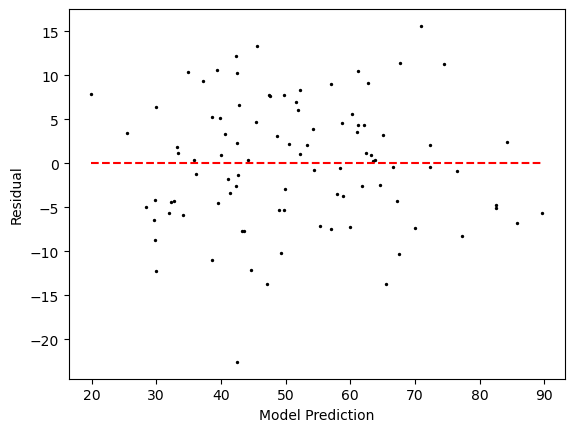

{'LM Statistic': 2.0120713289304204, 'LM-Test p-value': 0.7335384989129448, 'F-Statistic': 0.48767939796451837, 'F-Test p-value': 0.7447442952552821}
R-Squared on Test Data: 0.8331760331270734
Mean Squared Error on Test Data: 35.82994750454188


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_excel(db_dir + r'/MMA860 Assignment 2 Data.xlsx', sheet_name='Wine')

# Define features and target variable
import numpy as np
data['CountryFrance'] = np.where(data['Country'] == 'France', 1, 0)

X = data[['Price', 'Alcohol', 'Residual_Sugar', 'Sulphates', 'pH','CountryFrance']].values
y = data['Rating'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.95,random_state=0)

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''
reg = LinearRegression().fit(X_train, y_train)
print("R-Squared:", reg.score(X_train, y_train))
from statsmodels.formula.api import ols
model = ols('Rating ~ Price + Alcohol + Sulphates + CountryFrance',data).fit()
print(model.summary())


#Testing for heteroskasticity 

#Residuals calculated by definition above.
predicted_y = reg.predict(X_train)
#Note we can perform element-wise subtraction between arrays like so
residuals = y_train - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

#Import the relevant libraries and train the model

from statsmodels.stats.diagnostic import het_breuschpagan
results = ols('Rating ~ Price + Alcohol  + Sulphates + pH',data).fit()

#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(results.resid,results.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Predictions on the test set
y_pred_test = reg.predict(X_test)

# Evaluating the model on the test data
r_squared_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("R-Squared on Test Data:", r_squared_test)
print("Mean Squared Error on Test Data:", mse_test)

1. Checked if the data had any missing values:
No missing values were found in the dataset so MICE (Multiple Imputation by Chained Equations) was not needed to see if the missing values had significance to the model.
2. Removed features that had a high P value:
'Residual_Sugar' and 'pH'


3b.	Does the data appear to be heteroskedastic? Why or why not? Show evidence. 2 marks

2. Check the data features for heteroskaticity:
From the graph above, the data is scattered/ does not have a funnel shape meaning that it does not have heteroskaticity
3. Perform a Breusch-Pagan test:
The test results indicate that the null hypothesis of homoscedasticity (constant variance of the residuals) cannot be rejected because the p-values are well above the 0.05 threshold:
    1. LM-Test p-value: 0.8627
    2. F-Test p-value: 0.8718 

c.	 Assuming there are no data problems, what would a wine be rated if it comes from France, has a price of $39.99, sulphates of 1.1, alcohol of 13.9%, residual sugar of 1.83 and a pH of 2.1? 1 mark

In [77]:
features = pd.DataFrame({
    'Price': [39.99,41.00],
    'Alcohol': [13.9,13.9],
    'Residual_Sugar': [1.83,0],
    'Sulphates': [1.1,1.1],
    'pH': [2.1,0],
    'Country_France': [1,1],
})

# Add a constant for prediction with statsmodels
features_sm = sm.add_constant(features)

# Prediction using the built model
predicted_rating = results.predict(features_sm)
predicted_rating

0    72.802692
1    78.045035
dtype: float64

d.	Would increasing the price of a wine increase its expert rating? Be sure to clearly explain your thinking. 3 marks

When playing around with the model to find the correlation between price and rating there looks to be a correlation with the increase in price and higher the rating... But since we are only looking at France, it would be best to look at other regions as well. This could help in determine if the model could be applied in other regions.

4.	You might not know this about me, but I am pretty into ‘epic cooking’. I have, at times, cooked over 35 liters of curry in one batch (some for eating and some for preserving). I like to believe my curry is pretty good. In fact, I believe it is so good I may be able to sell it. I have simulated some data based on my understanding of the North American curry market in relation to price, advertising budget, how far away people live from the nearest retailer that might stock my curry, and what country people reside in. Of particular interest to me is whether Canadians and Americans feel differently about curry. 
    1. Build a model to predict sales. Include your model results and explain your process. 2 marks



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Obs        200 non-null    int64  
 1   Sales      200 non-null    float64
 2   Ad_Budget  200 non-null    float64
 3   Price      200 non-null    float64
 4   Distance   200 non-null    int64  
 5   Country    200 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB
None
R-Squared: 0.9837536773644723
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3592.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          5.49e-171
Time:                        17:28:06   Log-Likelihood:                -1590.2
No. O

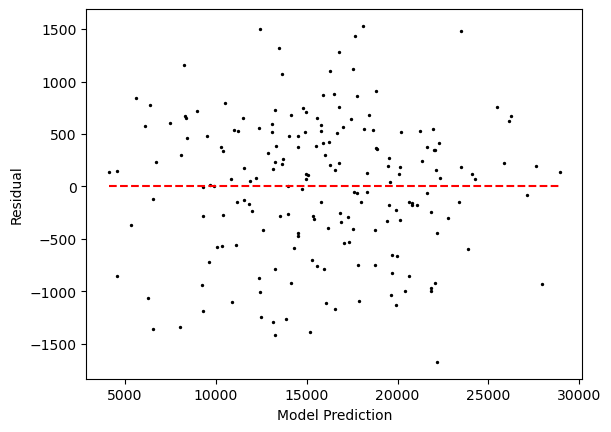

{'LM Statistic': 4.496936332082968, 'LM-Test p-value': 0.21256372238967816, 'F-Statistic': 1.502788932565293, 'F-Test p-value': 0.2151061781179506}
R-Squared on Test Data: 0.9063627184541558
Mean Squared Error on Test Data: 1089258.3604087473


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_excel(db_dir + r'/MMA860 Assignment 2 Data.xlsx', sheet_name='Curry')
print(data.info())

# ['Obs', 'Sales', 'Ad_Budget', 'Price', 'Distance', 'Country']

X = data[['Ad_Budget', 'Price', 'Distance']].values
y = data['Sales'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.95,random_state=0)

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''
reg = LinearRegression().fit(X_train, y_train)
print("R-Squared:", reg.score(X_train, y_train))

from statsmodels.formula.api import ols

model = ols('Sales ~ Ad_Budget + Price + Distance',data).fit()
print(model.summary())


#Testing for heteroskasticity 

#Residuals calculated by definition above.
predicted_y = reg.predict(X_train)
#Note we can perform element-wise subtraction between arrays like so
residuals = y_train - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

#Import the relevant libraries and train the model

from statsmodels.stats.diagnostic import het_breuschpagan
results = ols('Sales ~ Ad_Budget + Price + Distance',data).fit()


#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(results.resid,results.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Predictions on the test set
y_pred_test = reg.predict(X_test)

# Evaluating the model on the test data
r_squared_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("R-Squared on Test Data:", r_squared_test)
print("Mean Squared Error on Test Data:", mse_test)


2. I believe that US consumers respond more to changes in Ad_Budget than do Canadians.  Conduct the most powerful test you can to see if this is the case.  Briefly explain the test and your results (i.e. state the null, alternative, the p-value of the result and what it means.) 2 marks


In [20]:
import statsmodels.api as sm

# Create a binary variable for the US
import numpy as np
data['CountryUS'] = np.where(data['Country'] == 'US', 1, 0)

# Define the model with interaction term between Ad_Budget and Country_US
X = data[['Ad_Budget', 'CountryUS']]
X['Interaction'] = data['Ad_Budget'] * data['CountryUS']
X = sm.add_constant(X)  # adding a constant to the model
y = data['Sales']

# Build the OLS regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
model.summary()

/var/folders/mr/l3x9p9wd385gcyns864s9f2w0000gn/T/ipykernel_15536/2749058289.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Interaction'] = data['Ad_Budget'] * data['CountryUS']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6017.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          1.23e-192
Time:                        17:42:26   Log-Likelihood:                -1539.4
No. Observations:                 200   AIC:                             3087.
Df Residuals:                     196   BIC:                             3100.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -470.3953    222.264     -2.116      0.036    -908.732     -32.059
Ad_Budget      50.5848      0.715     70.735      0.000      49.174      51.995
CountryUS    1166.8289    266.943      4.371      0.000     640.380    1693.278
Interaction    -0.4675      0.844     -0.554      0.580      -2.132       1.197
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.241
Skew:                           0.041   Prob(JB):                        0.887
Kurtosis:                       3.149   Cond. No.                     3.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Define the hypothesis for just the interaction term
hypothesis = 'Interaction = 0'

# Perform the Wald test for the interaction term
interaction_test_result = model.wald_test(hypothesis)

# Print the result
print(interaction_test_result)

<F test: F=array([[0.30688003]]), p=0.5802325206546873, df_denom=196, df_num=1>


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


** H0: The coefficient of the interaction term (Ad_Budget × Country_US) is zero.
	•	This means that there is no difference in the response to Ad_Budget between US and Canadian consumers. The effect of Ad_Budget on sales is the same in both countries, indicating that the country does not modify the impact of Ad_Budget.
	
** H1: The coefficient of the interaction term is not zero .
	•	A non-zero coefficient could be either positive or negative, indicating that there is a difference in how Ad_Budget influences sales between the two countries. 

** i. If the interaction term is significantly positive (should H1 be true with a positive coefficient), it would suggest that increasing Ad_Budget leads to a greater increase in sales in the US than in Canada.

** ii. The results suggest that there is no significant interaction effect between Ad_Budget and Country_US. This means that we do not have evidence to support the hypothesis that US consumers respond more to changes in Ad_Budget than Canadian consumers.


3. Now conduct a Chow test to determine if Canadians are different from Americans.  Briefly explain these results, particularly in light of your test above. 3 marks